In [1]:
# only for taurus
import os
print(os.getcwd())
os.chdir("notebooks")
print(os.getcwd())

/data/horse/ws/jori152b-medinf/KP_MedInf
/data/horse/ws/jori152b-medinf/KP_MedInf/notebooks


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv('../data/analysis/data_preprocessed_extended_before_resampling.csv', parse_dates=['charttime'])

In [16]:
x1 = pd.read_csv('../data/preprocessed/preprocessed_data_extended_6H.csv', parse_dates=['charttime'])
x2 = pd.read_csv('../data/preprocessed/preprocessed_data.csv', parse_dates=['charttime'])

In [6]:
print(x1.columns)
print(x2.columns)

Index(['icustay_id', 'charttime', 'albumin_mean', 'aniongap_mean',
       'bands_mean', 'bicarbonate_mean', 'bilirubin_mean', 'bun_mean',
       'calcium', 'calcium_mean', 'chloride_mean', 'creat', 'creatinine_mean',
       'diasbp_mean', 'glucose_mean_x', 'glucose_mean_y', 'heartrate_mean',
       'hematocrit_mean', 'hemoglobin_mean', 'inr_mean', 'lactate_mean',
       'meanbp_mean', 'phosphate_mean', 'platelet_mean', 'potassium_mean',
       'pt_mean', 'ptt_mean', 'resprate_mean', 'sodium_mean', 'spo2_mean',
       'subject_id', 'sysbp_mean', 'tempc_mean', 'uo_rt_12hr', 'uo_rt_24hr',
       'uo_rt_6hr', 'uric_acid_mean', 'wbc_mean', 'sedative', 'vasopressor',
       'vent', 'hadm_id', 'aki_stage', 'admission_age', 'gender_F', 'gender_M',
       'ethnicity_grouped_asian', 'ethnicity_grouped_black',
       'ethnicity_grouped_hispanic', 'ethnicity_grouped_native',
       'ethnicity_grouped_other', 'ethnicity_grouped_unknown',
       'ethnicity_grouped_white', 'weight_first', 'height_fir

In [17]:
# get the difference in columns between x1 and x2
print(x1.columns.difference(x2.columns))

Index(['albumin_mean', 'bands_mean', 'bilirubin_mean', 'calcium',
       'calcium_mean', 'inr_mean', 'lactate_mean', 'phosphate_mean',
       'platelet_mean', 'pt_mean', 'ptt_mean', 'uric_acid_mean'],
      dtype='object')


In [ ]:
stats = df.describe()
print(stats)    
# save to csv
stats.to_csv('../data/analysis/data_preprocessed_extended_stats.csv', index=False)

In [19]:
# Initialize a dictionary to store results
results = {}

# List of columns to analyze (excluding the datetime and other non-measurement columns)
columns_to_analyze = df.columns.difference(['icustay_id', 'charttime', 'hadm_id', 'subject_id'])

# Group by icustay_id
grouped = df.groupby('icustay_id')

# Iterate through each column to analyze
for column in columns_to_analyze:
    frequencies = []
    mean_time_diffs = []
    std_time_diffs = []
    max_time_diffs = []
    min_time_diffs = []

    # Iterate through each group (each icustay_id)
    for icustay_id, group in grouped:
        valid_rows = group[group[column].notna()]

        frequency = valid_rows.shape[0]
        if frequency > 1:
            time_diffs = valid_rows['charttime'].diff().dropna().dt.total_seconds() / 60  # in minutes

            mean_time_diff = time_diffs.mean()
            std_time_diff = time_diffs.std()
            max_time_diff = time_diffs.max()
            min_time_diff = time_diffs.min()
        else:
            mean_time_diff = std_time_diff = max_time_diff = min_time_diff = None

        frequencies.append(frequency)
        mean_time_diffs.append(mean_time_diff)
        std_time_diffs.append(std_time_diff)
        max_time_diffs.append(max_time_diff)
        min_time_diffs.append(min_time_diff)

    # Aggregate the statistics across all icustay_id groups
    overall_frequency = sum(frequencies)
    overall_mean_time_diff = pd.Series(mean_time_diffs).mean()
    overall_std_time_diff = pd.Series(std_time_diffs).mean()
    overall_max_time_diff = pd.Series(max_time_diffs).max()
    overall_min_time_diff = pd.Series(min_time_diffs).min()

    results[column] = {
        'frequency': overall_frequency,
        'mean_time_diff': overall_mean_time_diff,
        'std_time_diff': overall_std_time_diff,
        'max_time_diff': overall_max_time_diff,
        'min_time_diff': overall_min_time_diff
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('../data/analysis/measurement_statistics_by_icustay.csv')


KeyboardInterrupt: 

In [ ]:
# drop all the columns in string format
X.drop(['first_hosp_stay'], axis=1, inplace = True)
X.drop(['first_icu_stay'], axis=1, inplace = True)
X.drop(['ethnicity'], axis=1, inplace = True)
X.drop(['admittime'], axis=1, inplace = True)
X.drop(['dischtime'], axis=1, inplace = True)
X.drop(['intime'], axis=1, inplace = True)
X.drop(['outtime'], axis=1, inplace = True)
X.drop(['dod'], axis=1, inplace = True)
X.drop(['charttime'], axis=1, inplace = True)


In [22]:
X = x1

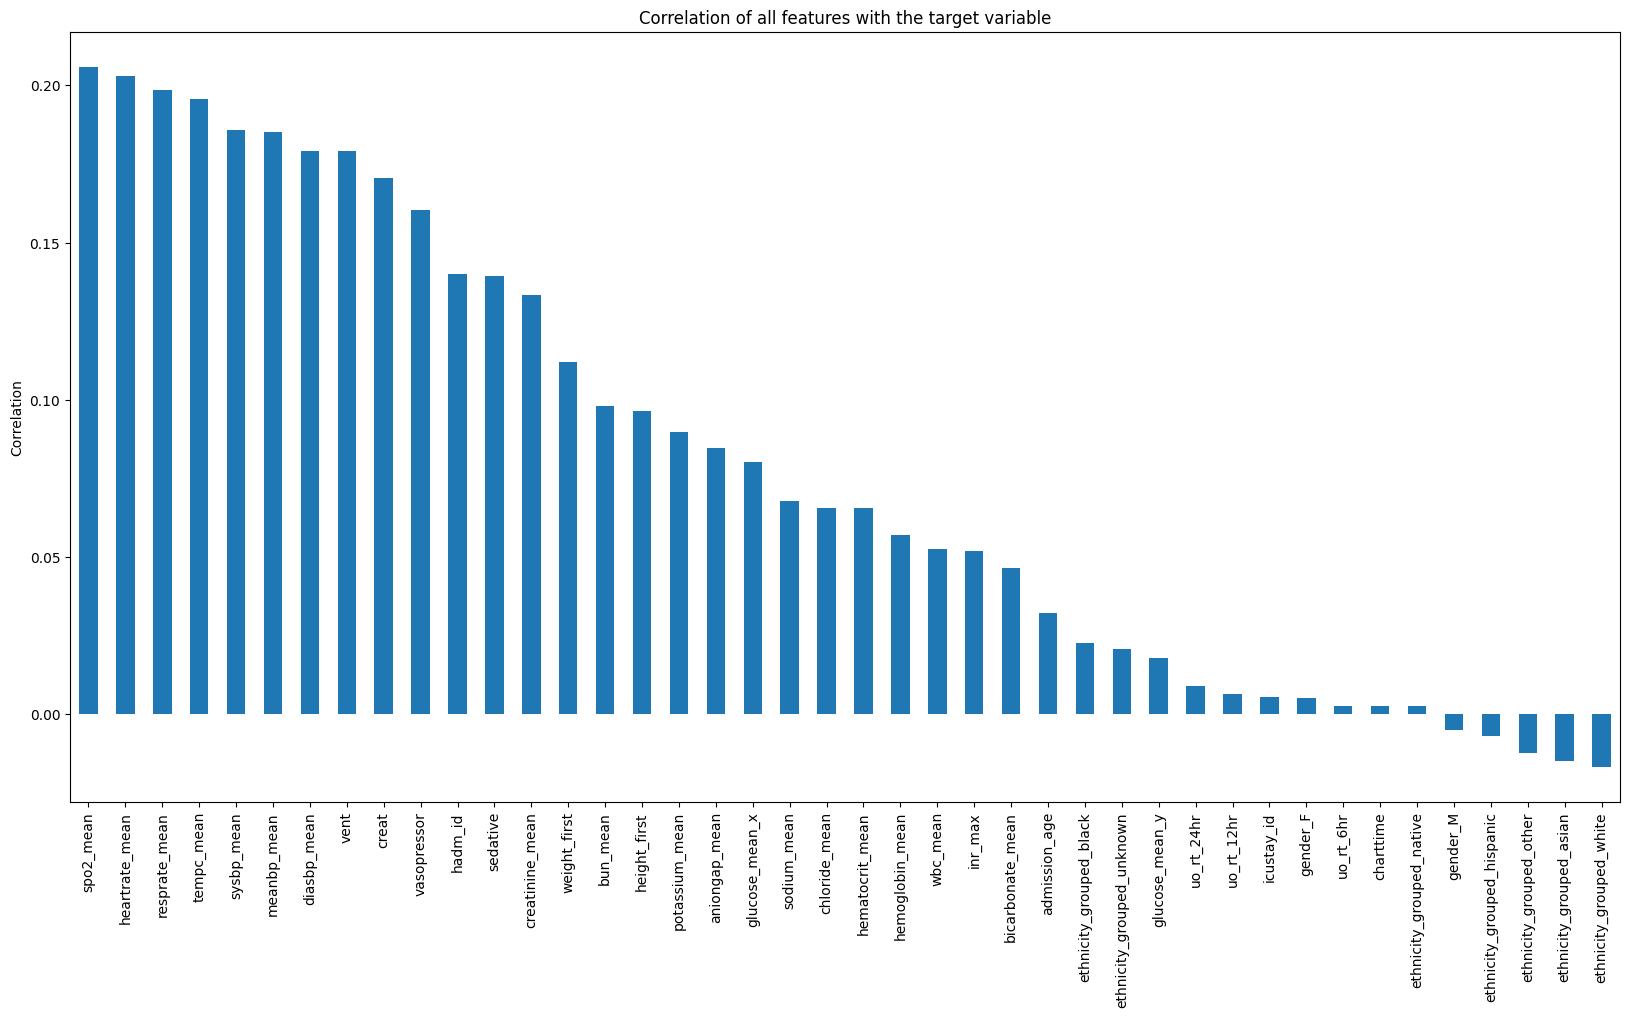

In [23]:
# Calculate correlations
correlations = X.corr()['aki_stage'].drop('aki_stage').sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(20,10))
correlations.plot(kind='bar')
plt.title('Correlation of all features with the target variable')
plt.ylabel('Correlation')
plt.show()

In [ ]:
# calculate the frequency of each attribute, i.e. the distribution of non nan values
X.apply(lambda x: x.count(), axis=0)